# Panorama dos acidentes e incidentes nos últimos 10 anos: qual o ano registrou maior número de ocorrências?
O ano de 2013 foi o que registrou mais ocorrências (654).

# Panorama dos acidentes e incidentes de acordo com os meses: qual o mês com mais registros de ocorrências?
O mês de Fevereiro foi o que registrou mais ocorrências (489).

# Panorama de acidentes e incidentes por estados: qual o estado brasileiro com mais ocorrências?
O estado de São Paulo é o que tem mais ocorrências registradas, totalizando 1261 ocorrências:
    348 Acidentes, 781 Incidentes e 132 Incidentes Graves.
    
Dentro do estado de SP, as cidades de SP, Guarulhos e Campinas são as 3 com maior número de ocorrências

# Panorama de Aeródromos com mais ocorrências no Brasil: Aeródromo de Guarulhos é o que mais possui ocorrências?
Os aeródromos com maior quantidade de ocorrências são: Guarulhos, Campo de Marte e Belo Horizonte.

In [5]:
import pandas as pd
import numpy as np
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# Carregamento dos dados para análise

In [6]:
df = pd.read_csv('dados/ocorrencias_filtradas.csv')

### Separando as classificações de incidentes:

In [7]:
acidentes = df.loc[df['ocorrencia_classificacao'] == 'ACIDENTE']
incidentes = df.loc[df['ocorrencia_classificacao'] == 'INCIDENTE']
incidentes_graves = df.loc[df['ocorrencia_classificacao'] == 'INCIDENTE GRAVE']

### Panorama dos acidentes e incidentes nos últimos 10 anos.

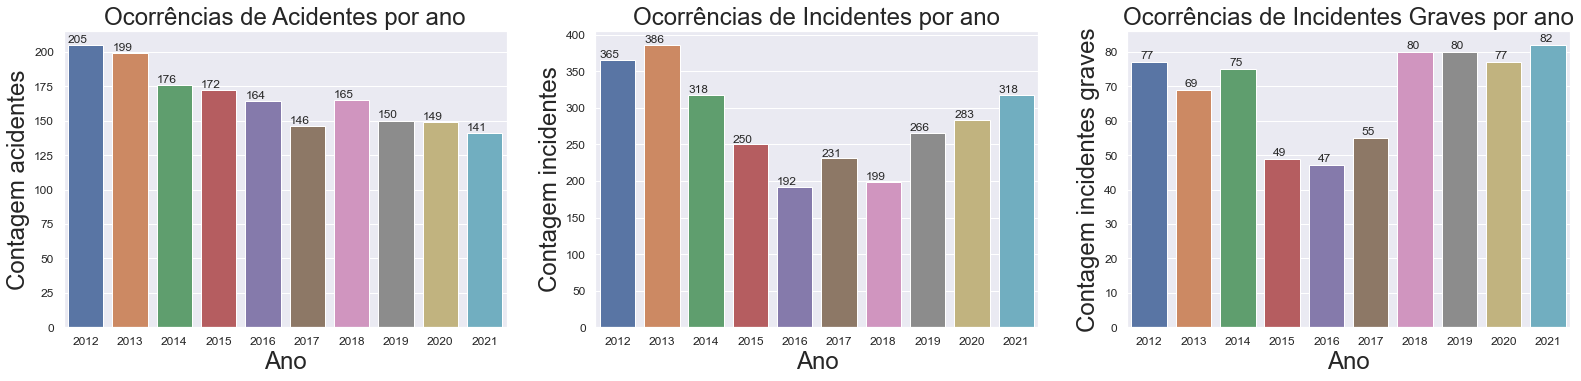

In [8]:
fig = plt.figure(figsize=(27,12))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

plot1 = plt.subplot(2, 3, 1)

ax = sns.countplot(x=acidentes.Ano ,data=acidentes)
plt.xlabel("Ano")
plt.ylabel("Contagem acidentes")
plt.title("Ocorrências de Acidentes por ano")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()+2))
        
plot2 = plt.subplot(2, 3, 2)
ax = sns.countplot(x=incidentes.Ano ,data=incidentes)
plt.xlabel("Ano")
plt.ylabel("Contagem incidentes")
plt.title("Ocorrências de Incidentes por ano")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()+3))

plot3 = plt.subplot(2, 3, 3)
ax = sns.countplot(x=incidentes_graves.Ano ,data=incidentes_graves)
plt.xlabel("Ano")
plt.ylabel("Contagem incidentes graves")
plt.title("Ocorrências de Incidentes Graves por ano")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+1))

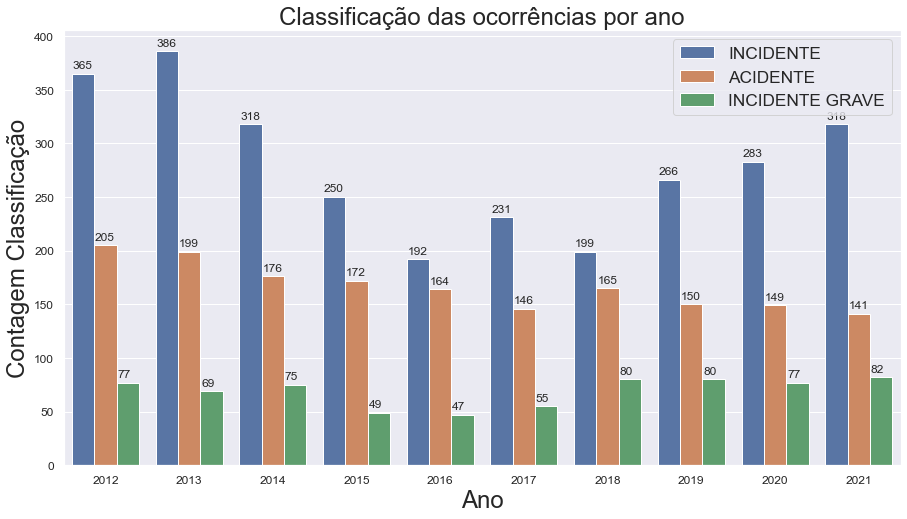

In [9]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = sns.countplot(x=df.Ano ,data=df, hue=df.ocorrencia_classificacao)
plt.legend(fontsize='x-large')
plt.xlabel("Ano")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências por ano")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.01, p.get_height()+5))

### Panorama dos acidentes e incidentes de acordo com os meses.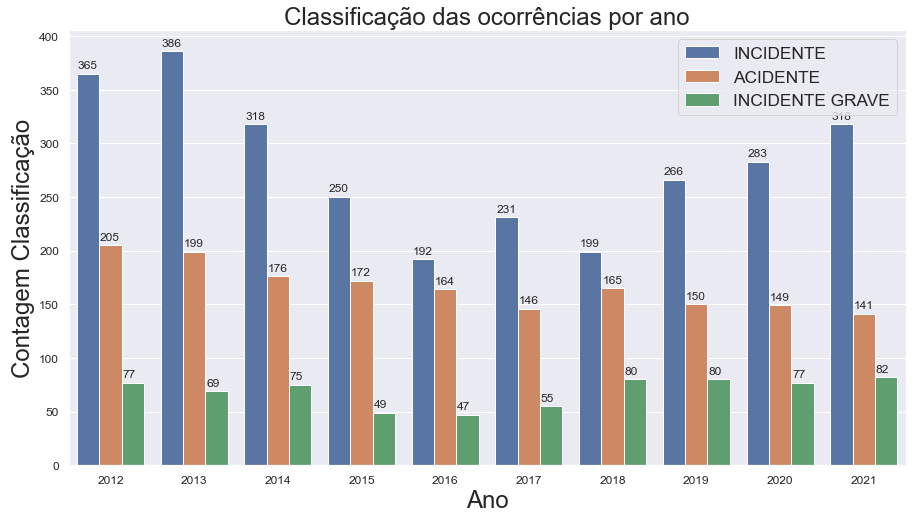

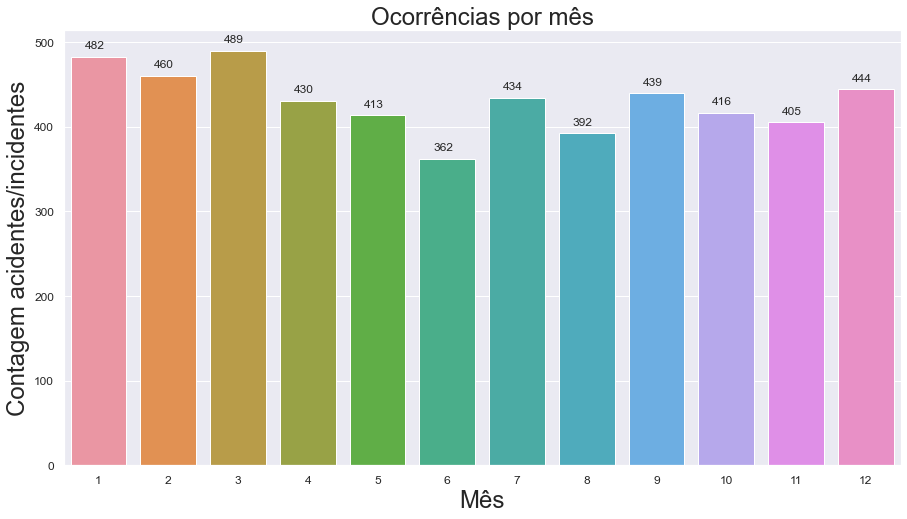

In [10]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = sns.countplot(x=df.Mes ,data=df)
plt.xlabel("Mês")
plt.ylabel("Contagem acidentes/incidentes")
plt.title("Ocorrências por mês")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+10))

### Panorama de acidentes e incidentes por estados.

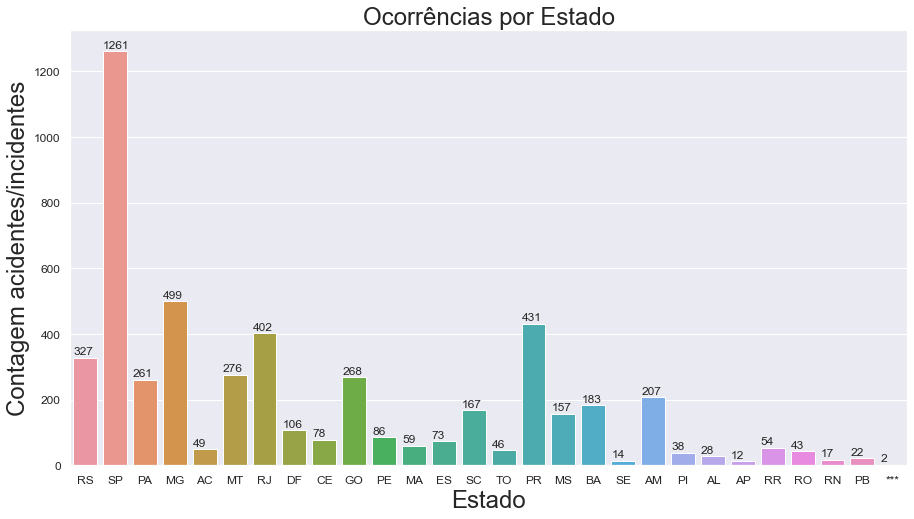

In [11]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = sns.countplot(x=df.ocorrencia_uf ,data=df)
plt.xlabel("Estado")
plt.ylabel("Contagem acidentes/incidentes")
plt.title("Ocorrências por Estado")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()+10))

## Entendendo as ocorrências do estado de São Paulo

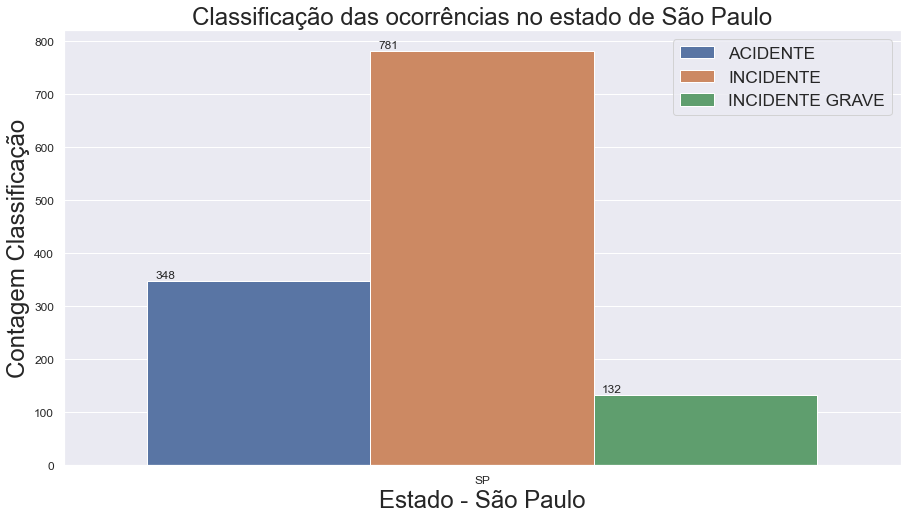

In [16]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = sns.countplot(x=df_SP.ocorrencia_uf ,data=df_SP, hue=df_SP.ocorrencia_classificacao)
plt.legend(fontsize='x-large')
plt.xlabel("Estado - São Paulo")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências no estado de São Paulo")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.01, p.get_height()+5))

### Escolhendo o estado com mais ocorrências para ser analisado.

In [13]:
df_SP = df[df['ocorrencia_uf'].str.contains("SP")]

### Escolhendo as 10 cidades com mais ocorrências em SP.

In [31]:
df_SP.ocorrencia_cidade.value_counts().head(10)

SÃO PAULO                247
CAMPINAS                 167
GUARULHOS                129
JUNDIAÍ                   75
RIBEIRÃO PRETO            63
BRAGANÇA PAULISTA         54
SÃO JOSÉ DOS CAMPOS       37
SOROCABA                  22
ATIBAIA                   20
SÃO JOSÉ DO RIO PRETO     17
Name: ocorrencia_cidade, dtype: int64

In [32]:
top10_SP_cidades = ['SÃO PAULO', 'CAMPINAS', 'GUARULHOS' , 'JUNDIAÍ', 'RIBEIRÃO PRETO', 'BRAGANÇA PAULIST', 'SÃO JOSÉ DOS CAMPOS', 'SOROCABA', 'ATIBAIA', 'SÃO JOSÉ DO RIO PRETO']
df_filter_SP_cidades = df_SP.query('ocorrencia_cidade in @top10_SP_cidades')

### Panorama de classificação de acidentes e incidentes no estado de SP:

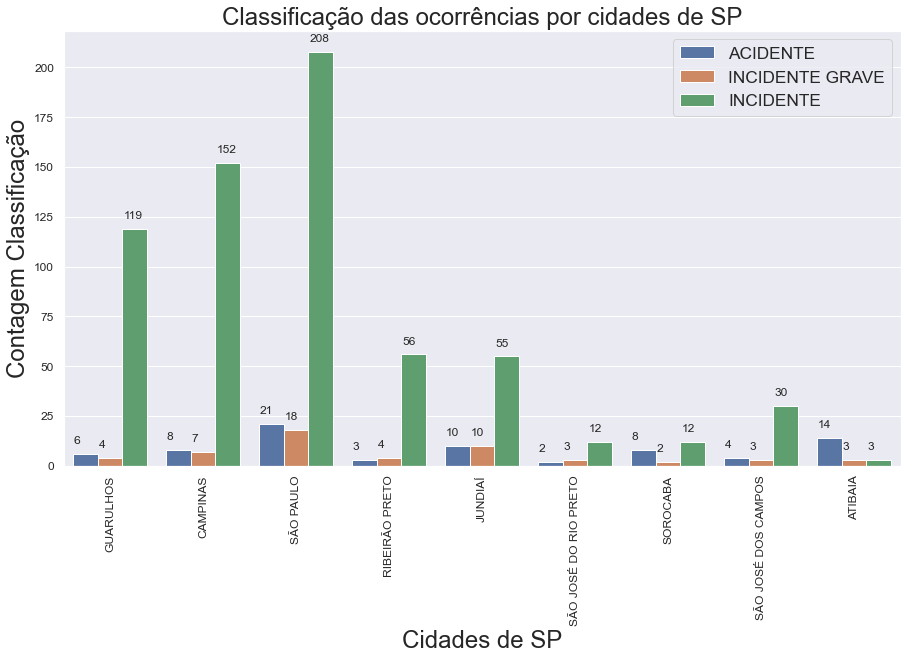

In [36]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = sns.countplot(x=df_filter_SP_cidades.ocorrencia_cidade ,data=df_filter_SP_cidades, hue=df_filter_SP_cidades.ocorrencia_classificacao)
plt.legend(fontsize='x-large')
plt.xlabel("Cidades de SP")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências por cidades de SP")
plt.xticks(rotation=90)

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.01, p.get_height()+5))

### Panorama de ocorrências por aeródromos no Brasil.

In [39]:
df['ocorrencia_aerodromo'].value_counts().head(10)

****     1708
*****     177
SBGR      125
SBMT      121
SBBH      105
SBKP       98
SBLO       86
SBGL       81
SBBR       76
SBJD       74
Name: ocorrencia_aerodromo, dtype: int64

In [42]:
aerodromo=df['ocorrencia_aerodromo'].value_counts().head(12)
aerodromo

****     1708
*****     177
SBGR      125
SBMT      121
SBBH      105
SBKP       98
SBLO       86
SBGL       81
SBBR       76
SBJD       74
SBPA       67
SBSP       63
Name: ocorrencia_aerodromo, dtype: int64

### Removendo os autódromos identificados por *, ficando apenas com os top 10 aerodromos

In [43]:
top10_aerodromos = aerodromo.index.tolist()[2:]
top10_aerodromos

['SBGR',
 'SBMT',
 'SBBH',
 'SBKP',
 'SBLO',
 'SBGL',
 'SBBR',
 'SBJD',
 'SBPA',
 'SBSP']

In [44]:
query_top10_aerodromos = df.query('ocorrencia_aerodromo in @top10_aerodromos')
top10_aerodromos_plot = query_top10_aerodromos.groupby(['ocorrencia_aerodromo', 'ocorrencia_classificacao']).size().reset_index().pivot(columns='ocorrencia_classificacao', index='ocorrencia_aerodromo', values=0)
top10_aerodromos_plot

ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
ocorrencia_aerodromo,,,
SBBH,3.0,99.0,3.0
SBBR,1.0,67.0,8.0
SBGL,1.0,76.0,4.0
SBGR,4.0,117.0,4.0
SBJD,8.0,56.0,10.0
SBKP,1.0,96.0,1.0
SBLO,5.0,78.0,3.0
SBMT,12.0,101.0,8.0
SBPA,1.0,66.0,NaN


<Figure size 1080x576 with 0 Axes>

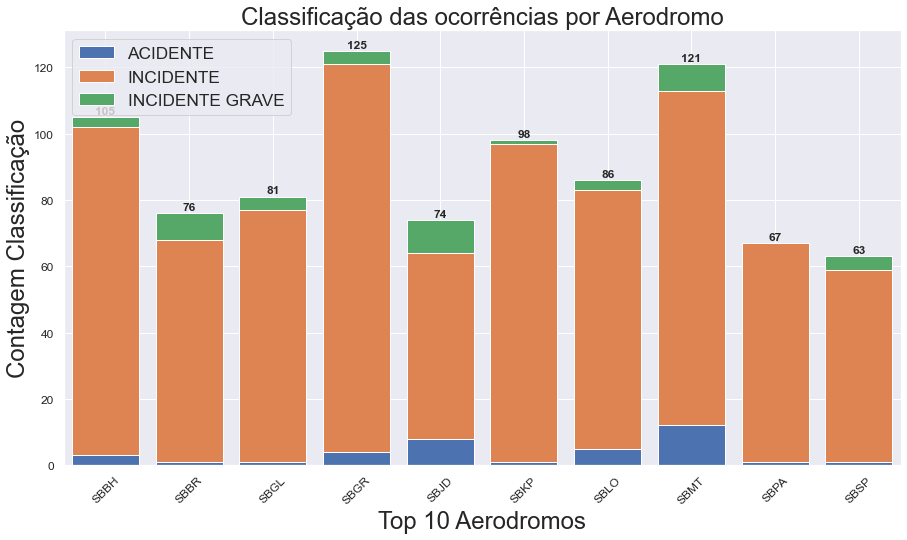

In [46]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = top10_aerodromos_plot.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.legend(fontsize='x-large')
plt.xlabel("Top 10 Aerodromos")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências por Aerodromo")
plt.xticks(rotation=45)

bottom = np.zeros(len(top10_aerodromos_plot))

for i, col in enumerate(top10_aerodromos_plot.columns):
    ax.bar(top10_aerodromos_plot.index, top10_aerodromos_plot[col], bottom=bottom, label=col)
    bottom += np.array(top10_aerodromos_plot[col])

# Somando as linhas dos dados para obter o valor total de cada barra.
totals = top10_aerodromos_plot.sum(axis=1)

# Add labels to each bar.
for i, total in enumerate(totals):
    ax.text(totals.index[i], total + 1, round(total), ha='center',
          weight='bold')

plt.show()